In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
     - Do these make sense?
    - Should certain outliers be kept or removed?
3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv




In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv?raw=true'
df = pd.read_csv(url)

In [3]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [4]:
#lets index date

In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df = df.set_index('Date')

In [7]:
# pull out month as well for the sake of aggregative measures and trends
df['Month'] = df.index.month_name()

In [8]:
df

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January
...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,December
2017-12-28,Thursday,37.8,1.25,32,0.5,16,December
2017-12-29,Friday,39.5,1.25,17,0.5,15,December


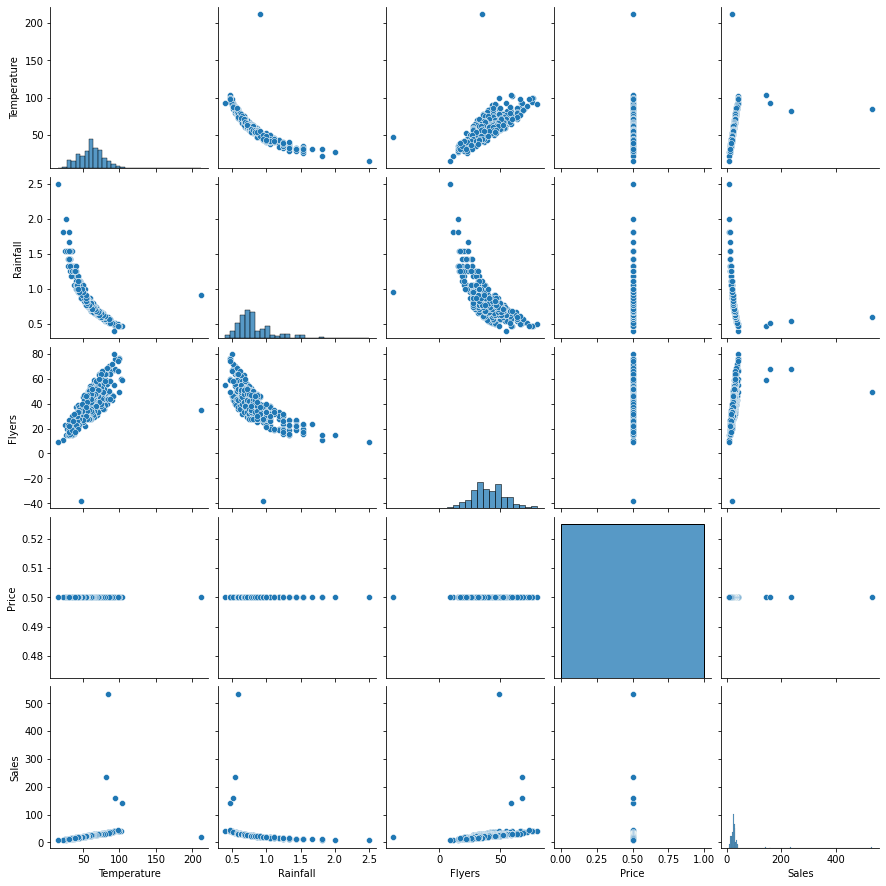

In [9]:
sns.pairplot(df)

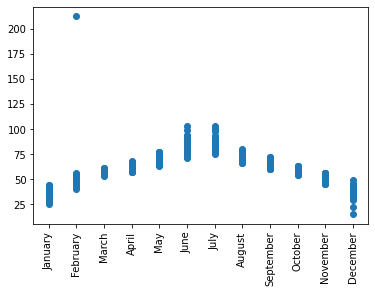

In [10]:
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.show()

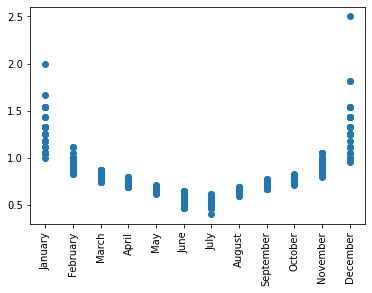

In [11]:
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation=90)
plt.show()

Day


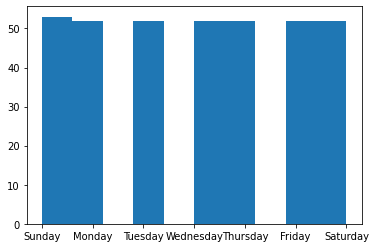

Temperature


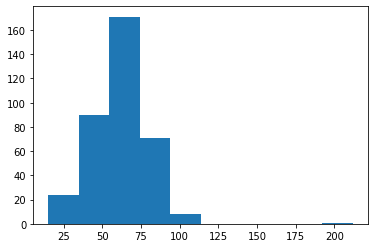

Rainfall


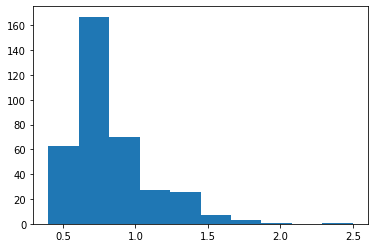

Flyers


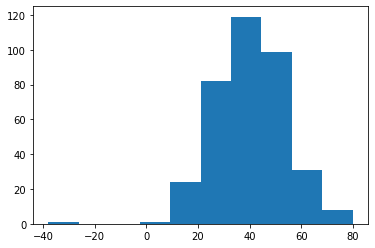

Price


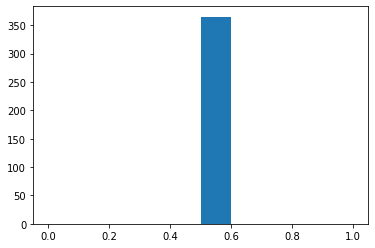

Sales


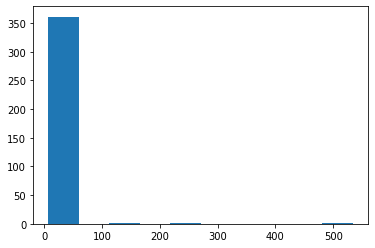

Month


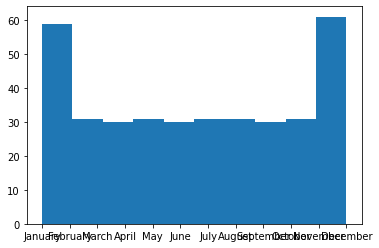

In [12]:
for col in df.columns:
    print(col)
    plt.hist(df[col])
    plt.show()

In [13]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [15]:

get_lower_and_upper_bounds(df.Rainfall)

(0.26, 1.3)

In [16]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


In [17]:
# keys of our outlier dictionary
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [18]:
# keys of the subdictionary for one of the columns:
outliers['Temperature'].keys()

dict_keys(['bounds', 'df'])

In [19]:
# value associated with the 'df' key of the 'Temperature' subdictionary of outliers
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [20]:

# print out our outliers dataframes using list comprehension
[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df'].to_markdown()) for key in outliers]


~~~~~~~~~~
 Temperature :
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |

~~~~~~~~~~
 Rainfall :
 | Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | Month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |      15 |

[None, None, None, None, None]

In [21]:
# at a multiplier of 3:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], mult=3.0)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


In [22]:

[print('\n~~~~~~~~~~\n', key, ':\n', outliers[key]['df']) for key in outliers]


~~~~~~~~~~
 Temperature :
                  Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                       
2017-02-11  Saturday        212.0      0.91      35    0.5     21  February

~~~~~~~~~~
 Rainfall :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-01-01   Sunday         27.0      2.00      15    0.5     10   January
2017-12-05  Tuesday         22.0      1.82      11    0.5     10  December
2017-12-10   Sunday         31.3      1.82      15    0.5     11  December
2017-12-31   Sunday         15.1      2.50       9    0.5      7  December

~~~~~~~~~~
 Flyers :
                 Day  Temperature  Rainfall  Flyers  Price  Sales     Month
Date                                                                      
2017-11-21  Tuesday         47.0      0.95     -38    0.5     20  November

~~~~~~~~~~
 Price :


[None, None, None, None, None]

In [23]:
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

In [24]:
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,1.840253
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,1.840253
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,0.817946
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,0.635391


In [25]:
df[df.z_score_rainfall.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,3.081626
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,3.629291
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,3.629291
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,6.112037


In [26]:
df[df.Flyers < 0] 

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836


In [27]:

df.loc['2017-11-19':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,0.160748
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,0.160748
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,0.635391
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,0.160748


In [28]:
df['Flyers'] = df['Flyers'].abs()

<AxesSubplot:>

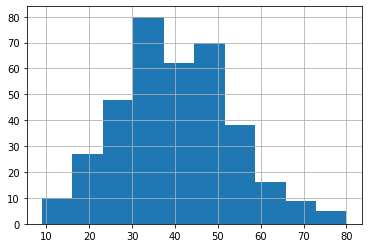

In [29]:
df['Flyers'].hist()

In [30]:
# based on what we saw in our outlier dataframes, let's pull that one high one.
df[df['Temperature'] > 200]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,0.306792


In [31]:
# similarly to the way before: let's examine the surrounding dates to see what regular looks like.
df.loc['2017-02-08': '2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,0.160748
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,0.635391
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,0.306792
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,0.306792
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,0.014704
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,1.037012


In [32]:

# Remember how autocorrelation looks in proximal temporal information.  Because 2/10 and 2/12 are close, I'll re-use
# 2/10's temperature for 2/11
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10']['Temperature']

In [33]:
# check that the thing happened
df.loc['2017-02-11']


Day                 Saturday
Temperature             50.0
Rainfall                0.91
Flyers                    35
Price                    0.5
Sales                     21
Month               February
z_score_rainfall    0.306792
Name: 2017-02-11 00:00:00, dtype: object

In [34]:
# check that the thing happened
df[df['Temperature'] > 200]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_score_rainfall
Date,,,,,,,,


In [35]:
# get an overhead view of everything again
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales,z_score_rainfall
count,365.000000,365.000000,365.000000,365.0,365.000000,3.650000e+02
mean,60.780822,0.825973,40.312329,0.5,27.865753,-2.958972e-15
std,16.272500,0.273890,13.163427,0.0,30.948132,1.000000e+00
min,15.100000,0.400000,9.000000,0.5,7.000000,-1.555267e+00
25%,49.700000,0.650000,31.000000,0.5,20.000000,-6.424931e-01
50%,61.100000,0.740000,39.000000,0.5,25.000000,-3.138943e-01
75%,71.300000,0.910000,49.000000,0.5,30.000000,3.067922e-01
max,102.900000,2.500000,80.000000,0.5,534.000000,6.112037e+00
